In [ ]:
!nvidia-smi

Thu Jun 12 05:07:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%pip install "ultralytics<=8.3.40" roboflow supervision

import ultralytics
ultralytics.checks()

import os
HOME = os.getcwd()
print("Working directory:", HOME)

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/112.6 GB disk)
Working directory: /content


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="API_KEY")
project = rf.workspace("WORKSPACE").project("PROJECT")
dataset = project.version(n).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls {dataset.location}

!cat {dataset.location}/data.yaml

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
names:
- Compass
- Divider
- Eraser
- Pencil
- Protractor_180deg
- Scale_15cm
- Set_Square_45deg
- Set_Square_60deg
- Sharpener
nc: 9
roboflow:
  license: CC BY 4.0
  project: mathematical-drawing-instruments
  url: https://universe.roboflow.com/ml-project-68ius/mathematical-drawing-instruments/dataset/3
  version: 3
  workspace: ml-project-68ius
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
print(f"Dataset downloaded to: {dataset.location}")
print(f"Full data.yaml path: {dataset.location}/data.yaml")

Dataset downloaded to: /content/Mathematical-Drawing-Instruments-3
Full data.yaml path: /content/Mathematical-Drawing-Instruments-3/data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

results = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='GeoSet-Ennea_yolov8'
)

100%|██████████| 49.7M/49.7M [00:00<00:00, 95.7MB/s]


New https://pypi.org/project/ultralytics/8.3.153 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Mathematical-Drawing-Instruments-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=GeoSet-Ennea_yolov8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

100%|██████████| 755k/755k [00:00<00:00, 26.3MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /content/Mathematical-Drawing-Instruments-3/train/labels... 676 images, 0 backgrounds, 0 corrupt: 100%|██████████| 676/676 [00:00<00:00, 2121.87it/s]

train: New cache created: /content/Mathematical-Drawing-Instruments-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Mathematical-Drawing-Instruments-3/valid/labels... 193 images, 0 backgrounds, 0 corrupt: 100%|██████████| 193/193 [00:00<00:00, 1304.02it/s]

val: New cache created: /content/Mathematical-Drawing-Instruments-3/valid/labels.cache


Plotting labels to runs/detect/GeoSet-Ennea_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/GeoSet-Ennea_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.61G      1.505       1.96      1.621         76        640: 100%|██████████| 43/43 [00:23<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        193       1667      0.701      0.765      0.779      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.99G      1.185      1.023      1.369         71        640: 100%|██████████| 43/43 [00:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        193       1667      0.852      0.828      0.888      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         7G      1.181     0.9504      1.362         64        640: 100%|██████████| 43/43 [00:22<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        193       1667      0.787      0.827      0.871      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.96G      1.173     0.9171      1.368         56        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        193       1667      0.891      0.849       0.93       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.96G      1.131     0.8287      1.335         53        640: 100%|██████████| 43/43 [00:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        193       1667      0.911       0.92      0.967      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.99G      1.126     0.7831      1.329         40        640: 100%|██████████| 43/43 [00:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        193       1667      0.929      0.918      0.974      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.91G      1.119     0.7649      1.316         64        640: 100%|██████████| 43/43 [00:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        193       1667      0.926      0.952      0.969      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.01G      1.106     0.7442       1.32         49        640: 100%|██████████| 43/43 [00:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        193       1667      0.948      0.956      0.982      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.98G      1.114     0.7363      1.317         70        640: 100%|██████████| 43/43 [00:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        193       1667      0.954      0.968      0.987       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.99G      1.062     0.7007      1.293         46        640: 100%|██████████| 43/43 [00:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        193       1667      0.958      0.958      0.986      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.81G      1.057     0.6643      1.262         88        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        193       1667      0.972      0.964      0.991      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.98G      1.049     0.6503      1.268         48        640: 100%|██████████| 43/43 [00:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        193       1667      0.963       0.98      0.988      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.97G      1.036     0.6681      1.266         46        640: 100%|██████████| 43/43 [00:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        193       1667      0.963      0.977       0.99       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.98G      1.023     0.6107      1.252         60        640: 100%|██████████| 43/43 [00:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        193       1667      0.981       0.98      0.991      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       6.9G      1.026     0.6045      1.269         50        640: 100%|██████████| 43/43 [00:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        193       1667      0.978      0.979      0.993      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.98G      1.012     0.5949       1.24         55        640: 100%|██████████| 43/43 [00:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        193       1667      0.983      0.986      0.993      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.98G      1.007      0.592      1.234         51        640: 100%|██████████| 43/43 [00:21<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        193       1667      0.984      0.991      0.992       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         7G     0.9992     0.5731      1.244         64        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        193       1667      0.973      0.988      0.989      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.91G     0.9867     0.5642      1.238         55        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        193       1667      0.992      0.991      0.993      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.98G     0.9655     0.5411       1.22         51        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        193       1667      0.985      0.988      0.992      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.98G     0.9787     0.5596      1.239         52        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]

                   all        193       1667      0.981      0.991      0.992      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.01G     0.9802     0.5623      1.242         63        640: 100%|██████████| 43/43 [00:21<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        193       1667       0.99      0.993      0.992      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       6.9G     0.9656     0.5452      1.223         33        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        193       1667       0.99       0.99      0.993      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.99G     0.9492     0.5202      1.209         57        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        193       1667      0.987      0.996      0.994      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.95G     0.9492     0.5177      1.202         47        640: 100%|██████████| 43/43 [00:21<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        193       1667      0.989      0.994      0.993      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.99G     0.9397     0.5092      1.197         77        640: 100%|██████████| 43/43 [00:21<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        193       1667      0.992      0.993      0.994      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.87G       0.95     0.5159      1.205         41        640: 100%|██████████| 43/43 [00:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        193       1667       0.99      0.996      0.993      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.98G     0.9301     0.4949      1.205         42        640: 100%|██████████| 43/43 [00:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        193       1667       0.99      0.998      0.993      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.99G     0.9306     0.4958      1.194         84        640: 100%|██████████| 43/43 [00:21<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        193       1667      0.986      0.994      0.994      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.01G      0.928     0.4816      1.188         77        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        193       1667      0.992      0.994      0.994      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.87G     0.9266     0.4798      1.194         54        640: 100%|██████████| 43/43 [00:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        193       1667      0.991      0.996      0.994      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.96G      0.919     0.4754      1.188         38        640: 100%|██████████| 43/43 [00:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        193       1667      0.992      0.995      0.993      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.97G      0.911     0.4684      1.185         65        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        193       1667      0.993      0.997      0.994      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.98G     0.8996     0.4523       1.18         68        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        193       1667      0.992      0.995      0.993       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.89G      0.892     0.4507      1.166         79        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        193       1667      0.994      0.997      0.994      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.97G     0.8906      0.458      1.183         69        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        193       1667      0.997      0.996      0.994      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.97G     0.8825     0.4514      1.173         69        640: 100%|██████████| 43/43 [00:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        193       1667      0.994      0.997      0.994      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.99G     0.8816     0.4386      1.168         54        640: 100%|██████████| 43/43 [00:21<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        193       1667      0.993      0.995      0.994      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.88G     0.8761     0.4364      1.161         58        640: 100%|██████████| 43/43 [00:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        193       1667      0.991      0.998      0.994      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.98G     0.8517       0.43      1.157         43        640: 100%|██████████| 43/43 [00:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        193       1667      0.995      0.997      0.993      0.766


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.88G     0.8058     0.3594      1.126         36        640: 100%|██████████| 43/43 [00:22<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        193       1667      0.991      0.994      0.994      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       6.9G     0.8019     0.3514      1.112         36        640: 100%|██████████| 43/43 [00:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        193       1667      0.992      0.995      0.994       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.78G     0.7895     0.3445      1.103         31        640: 100%|██████████| 43/43 [00:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        193       1667      0.995      0.995      0.994      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.87G     0.7819     0.3374      1.092         31        640: 100%|██████████| 43/43 [00:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        193       1667      0.994      0.996      0.994      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.86G     0.7772     0.3357      1.089         29        640: 100%|██████████| 43/43 [00:21<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        193       1667      0.994      0.996      0.994      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.89G     0.7705     0.3257      1.081         33        640: 100%|██████████| 43/43 [00:21<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        193       1667      0.994      0.997      0.994       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.78G      0.766     0.3275      1.083         34        640: 100%|██████████| 43/43 [00:21<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        193       1667      0.995      0.997      0.994      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.88G     0.7636     0.3196      1.095         27        640: 100%|██████████| 43/43 [00:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        193       1667      0.994      0.997      0.994      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.86G      0.751     0.3142      1.084         35        640: 100%|██████████| 43/43 [00:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        193       1667      0.995      0.996      0.994      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       6.9G     0.7504     0.3123      1.089         35        640: 100%|██████████| 43/43 [00:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        193       1667      0.995      0.996      0.994      0.774



50 epochs completed in 0.404 hours.
Optimizer stripped from runs/detect/GeoSet-Ennea_yolov8/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/GeoSet-Ennea_yolov8/weights/best.pt, 52.0MB

Validating runs/detect/GeoSet-Ennea_yolov8/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


                   all        193       1667      0.995      0.997      0.994      0.775
               Compass        186        186      0.989          1      0.992      0.802
               Divider        189        189      0.993          1      0.995      0.754
                Eraser        184        184      0.994          1      0.995      0.675
                Pencil        193        193      0.998          1      0.995      0.705
     Protractor_180deg        192        192          1      0.993      0.995      0.834
            Scale_15cm        191        192      0.989      0.995       0.99      0.802
      Set_Square_45deg        189        190      0.991      0.995      0.995      0.859
      Set_Square_60deg        156        156      0.996      0.994      0.995      0.863
             Sharpener        185        185          1          1      0.995      0.684
Speed: 0.3ms preprocess, 9.2ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect

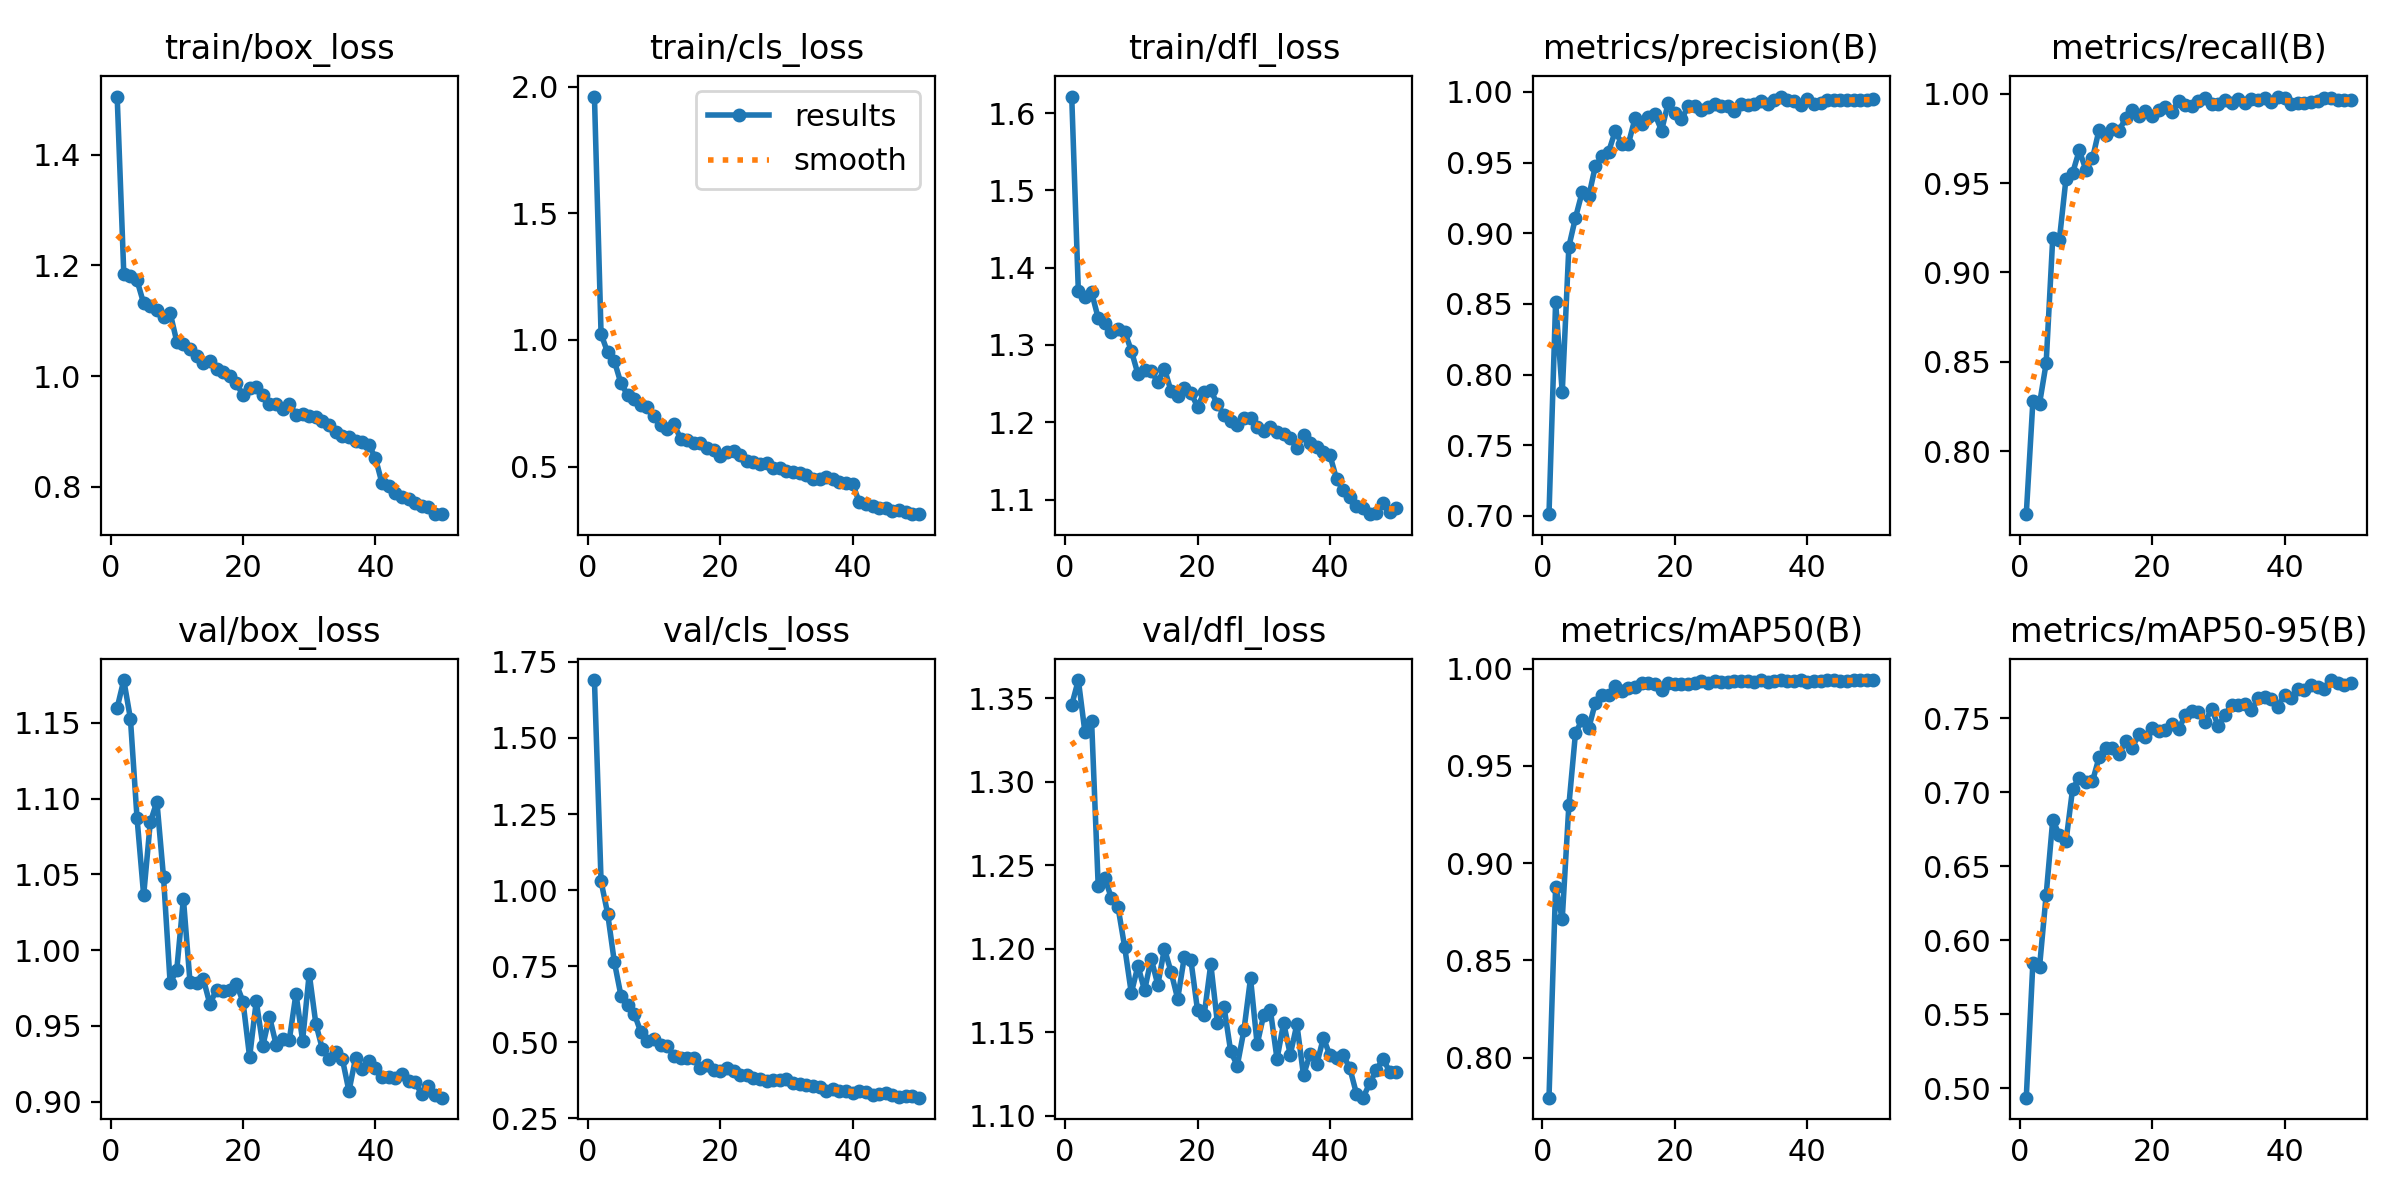

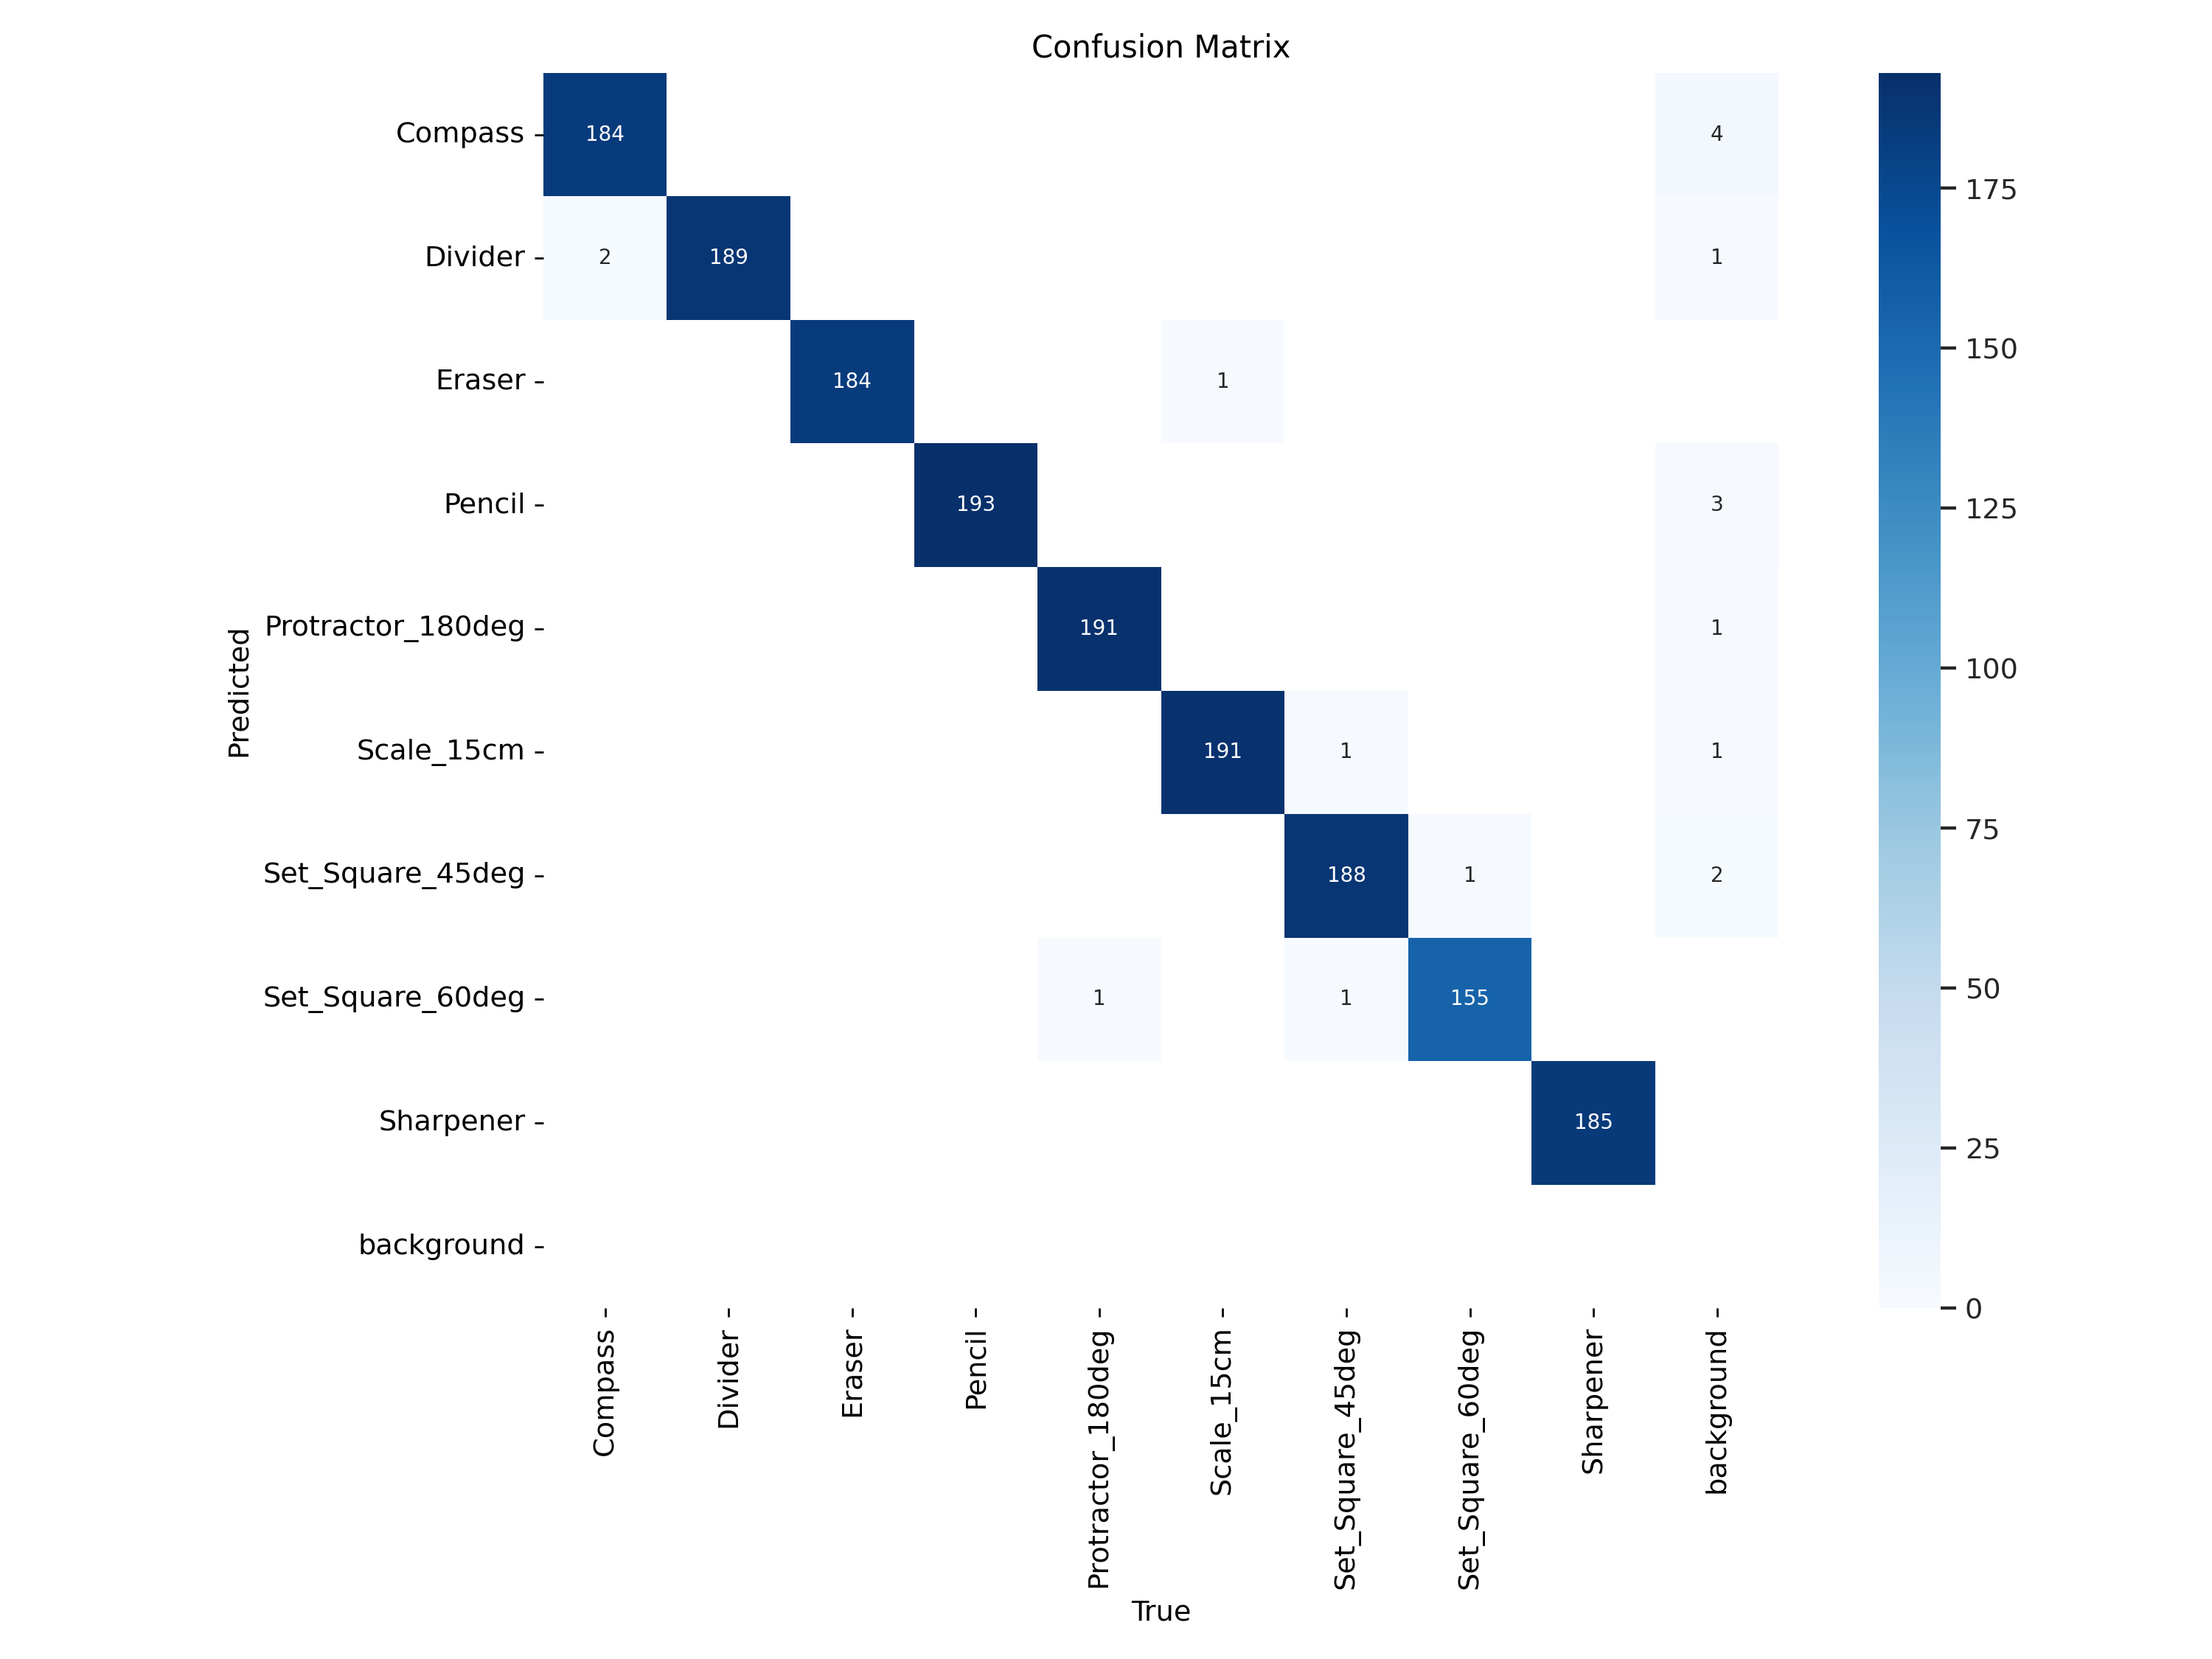

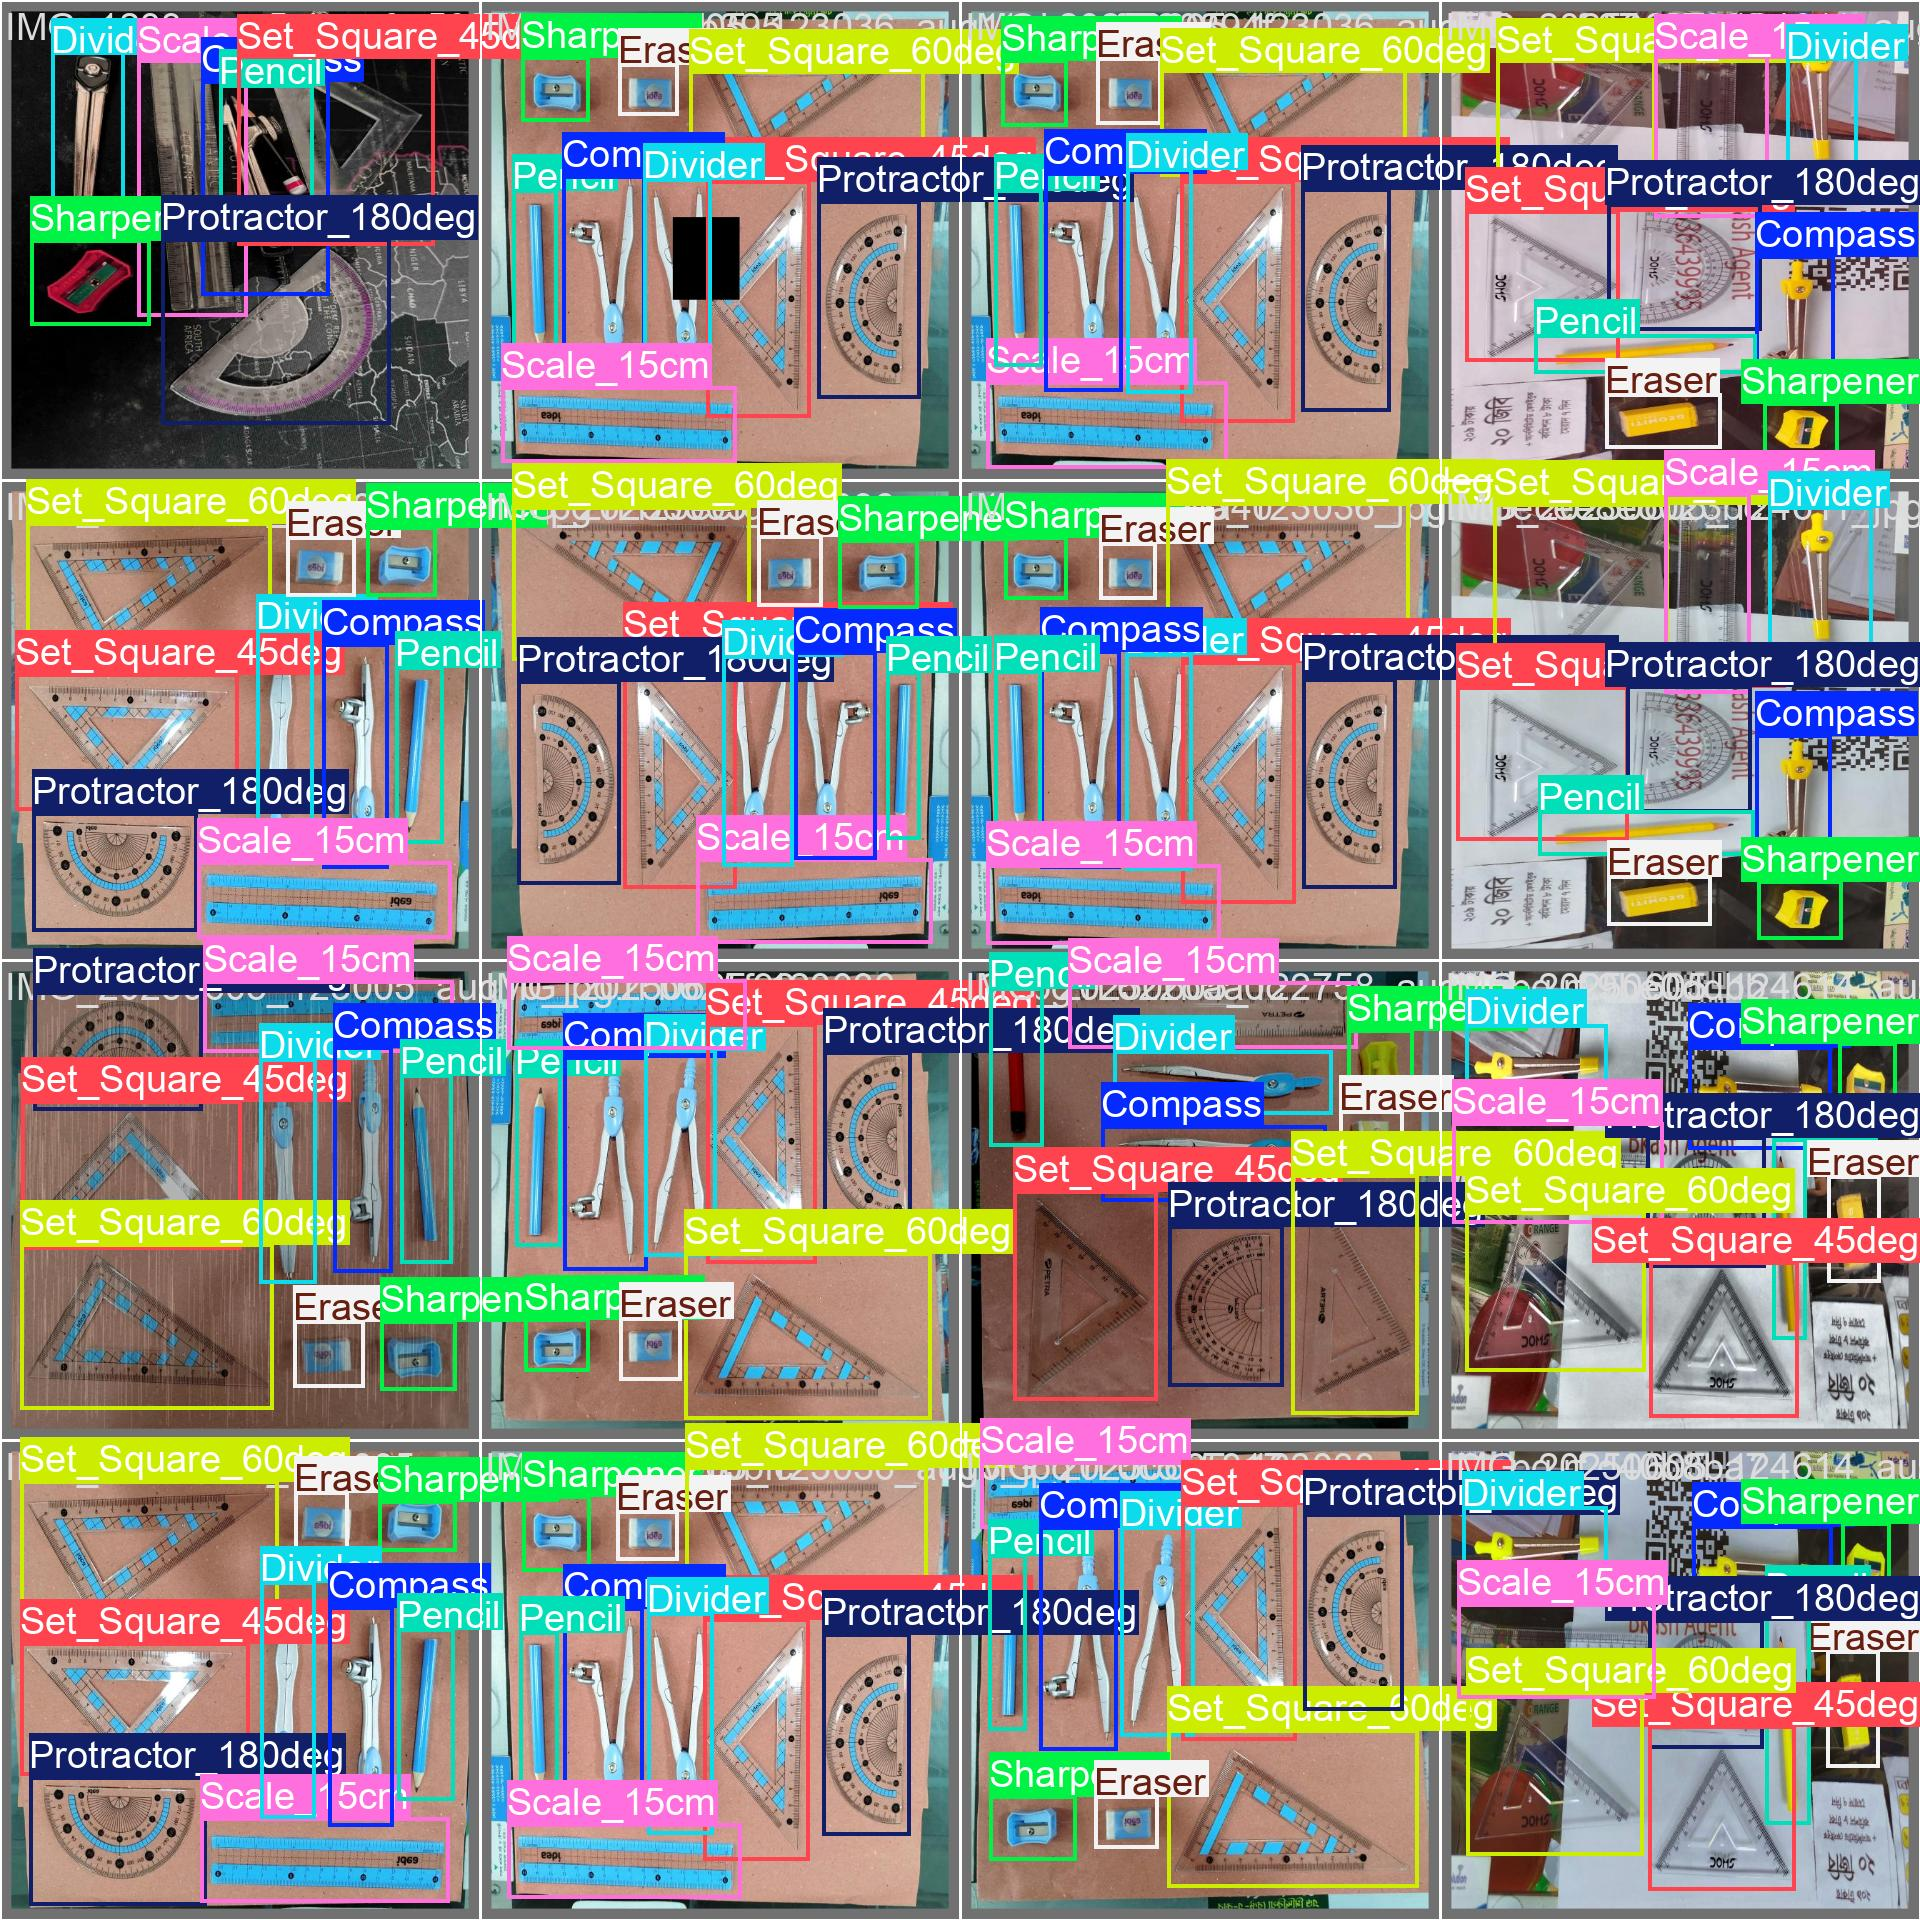

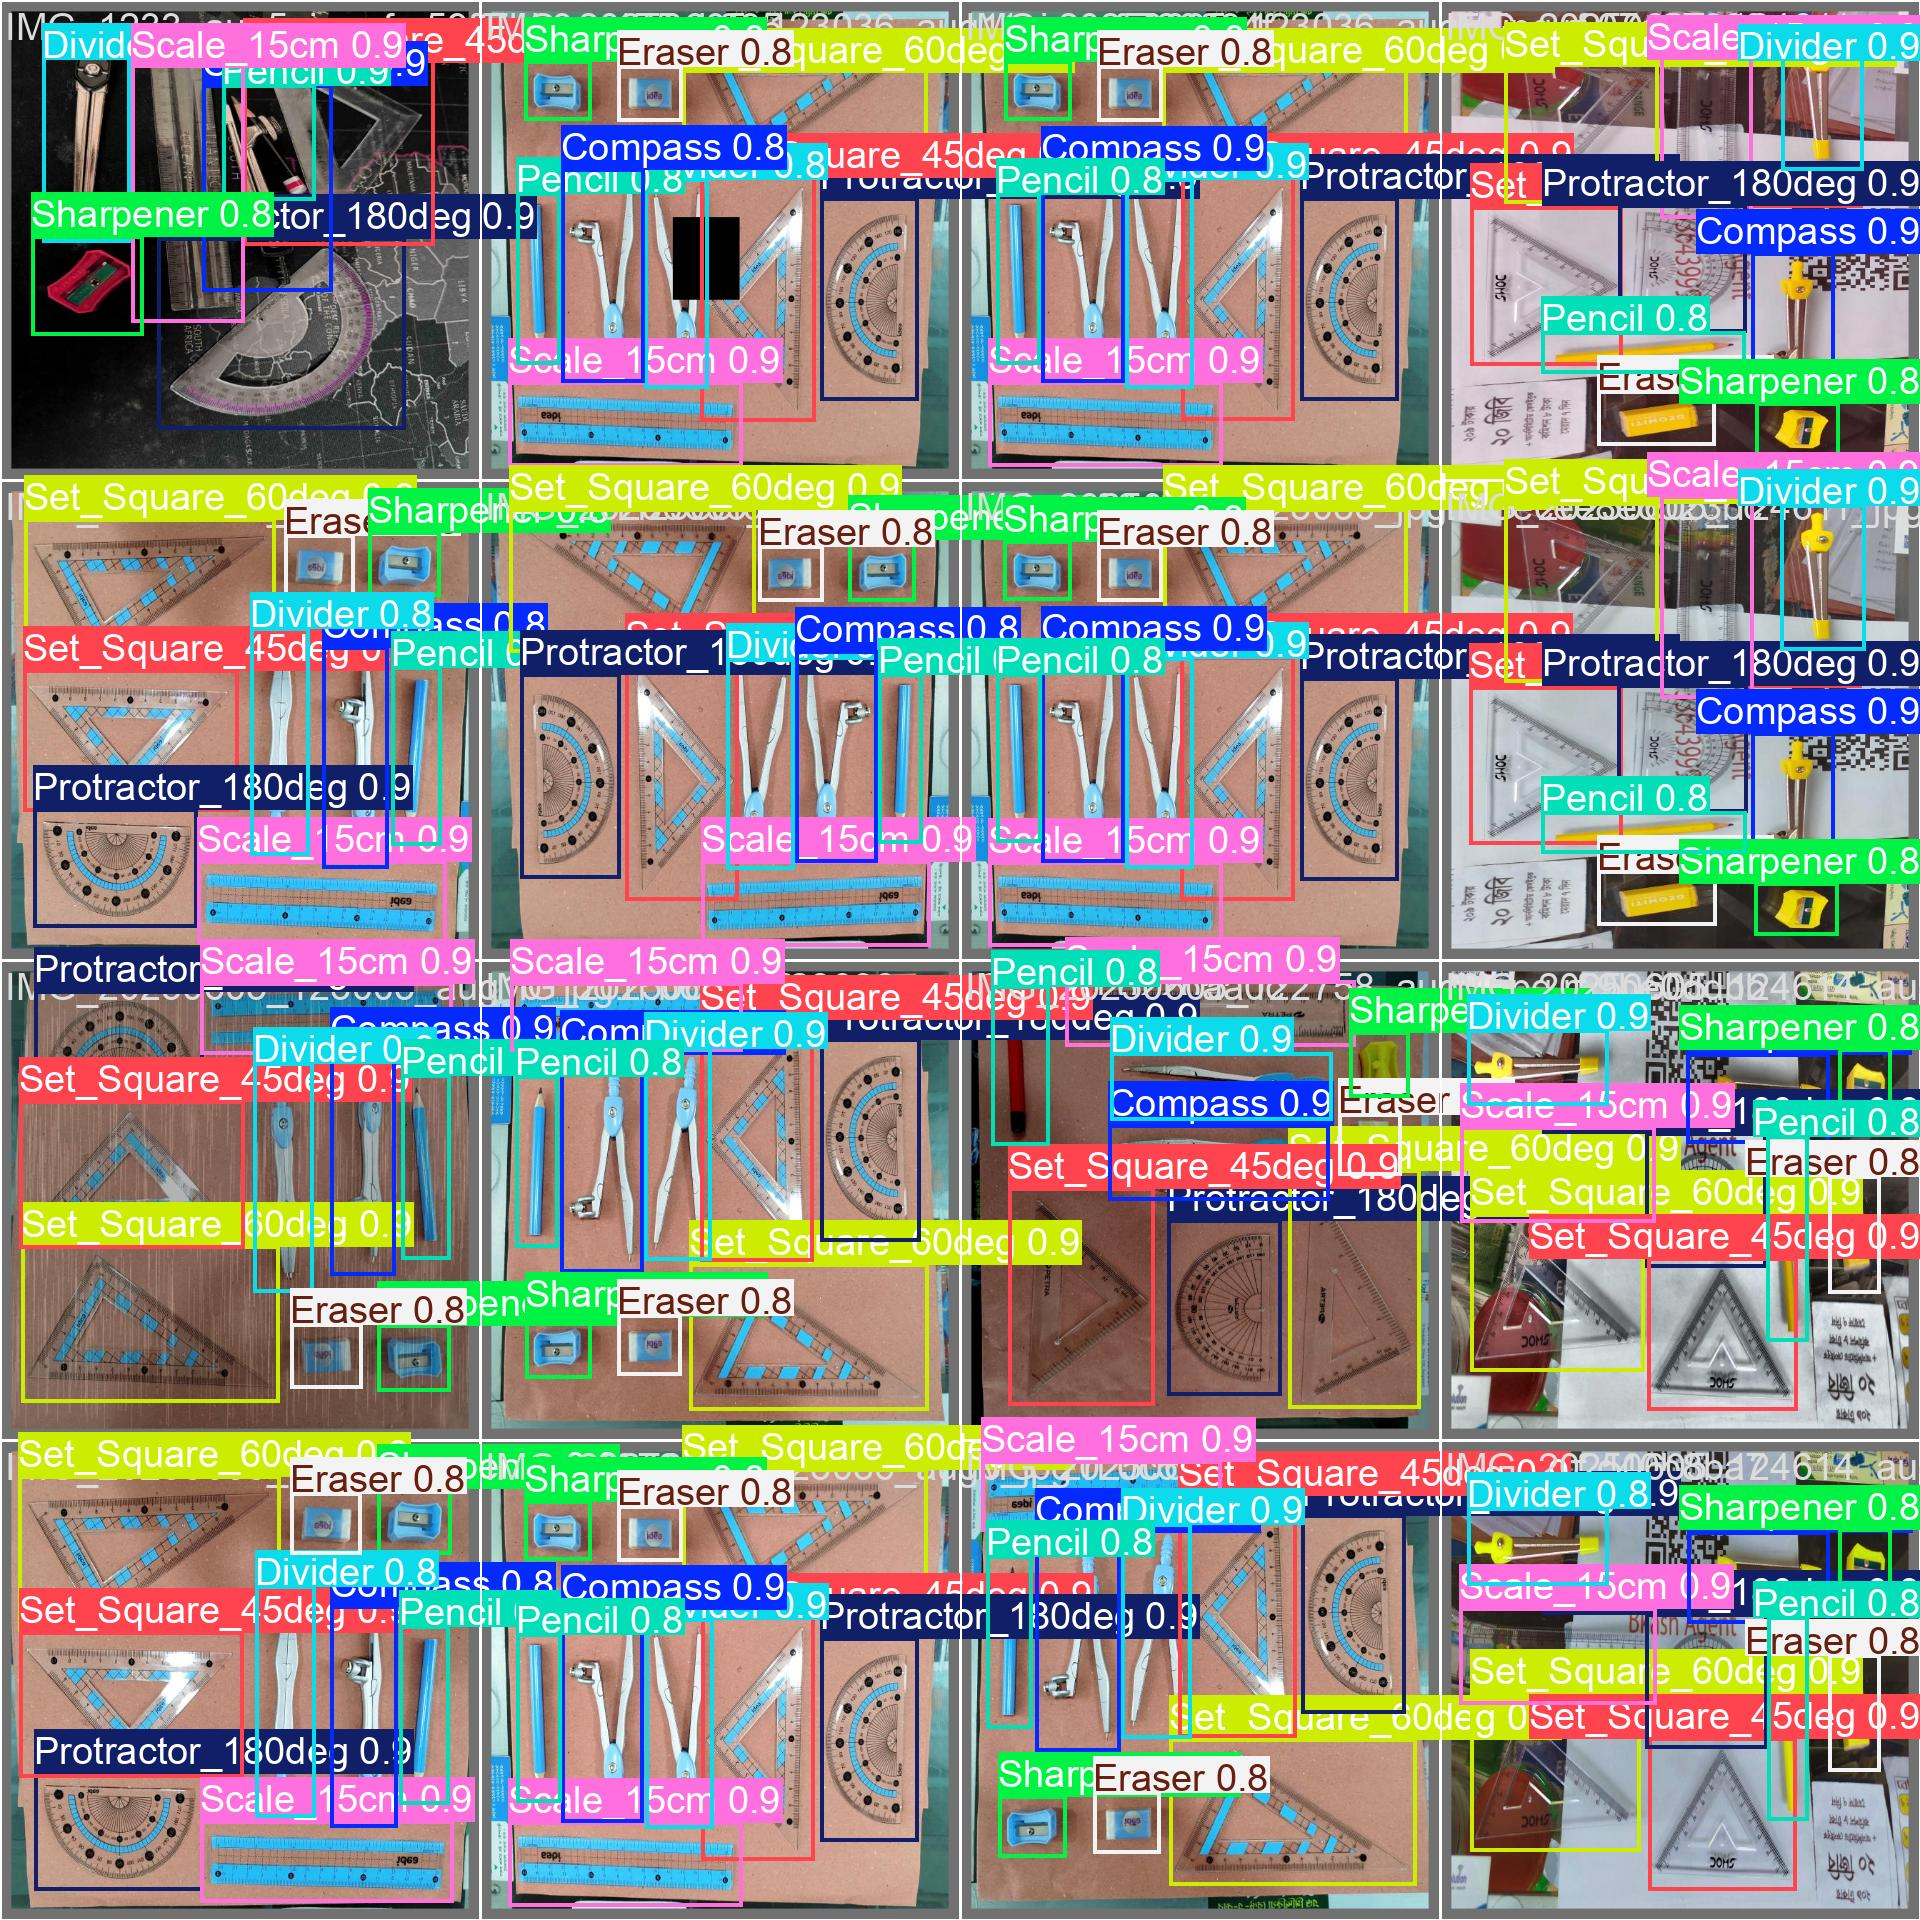

In [ ]:
from IPython.display import Image, display
import os

results_dir = '/content/runs/detect/GeoSet-Ennea_yolov8'

result_files = [
    'results.png',
    'confusion_matrix.png',
    'val_batch0_labels.jpg',
    'val_batch0_pred.jpg'
]

for file in result_files:
    file_path = os.path.join(results_dir, file)
    if os.path.exists(file_path):
        display(Image(filename=file_path, width=800))
        print("\n")
    else:
        print(f"⚠️ File not found: {file_path}")

In [ ]:
!zip -r /content/GeoSet-Ennea_yolov8.zip /content/runs/detect/GeoSet-Ennea_yolov8
from google.colab import files
files.download('/content/GeoSet-Ennea_yolov8.zip')

  adding: content/runs/detect/GeoSet-Ennea_yolov8/ (stored 0%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/confusion_matrix.png (deflated 23%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/PR_curve.png (deflated 20%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/results.csv (deflated 85%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/val_batch2_labels.jpg (deflated 11%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/val_batch2_pred.jpg (deflated 9%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/args.yaml (deflated 51%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/P_curve.png (deflated 17%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/train_batch1722.jpg (deflated 6%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/labels.jpg (deflated 21%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/val_batch0_pred.jpg (deflated 5%)
  adding: content/runs/detect/GeoSet-Ennea_yolov8/train_batch0.jpg (deflated 2%)
  adding: content/runs/detect/GeoSet-Ennea_yolov

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>